In [34]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('advertising.csv')

In [3]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [9]:
X = df.drop({'Ad Topic Line','City','Country','Timestamp','Clicked on Ad'},axis=1)
y=df['Clicked on Ad']

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
scaler.fit_transform(X)

array([[ 0.24926659, -0.11490498,  0.50969109,  1.73403   , -0.96269532],
       [ 0.96113227, -0.57042523,  1.00253021,  0.31380538,  1.03875025],
       [ 0.28208309, -1.13982553,  0.35694859,  1.28758905, -0.96269532],
       ..., 
       [-0.84377541,  1.707176  , -0.93857029, -1.35892388,  1.03875025],
       [-0.59638946, -1.93698596, -0.97548353,  0.18117208, -0.96269532],
       [-1.26155474, -1.13982553, -1.87383208, -0.0376045 , -0.96269532]])

In [18]:
from sklearn.model_selection import  train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [11]:
# logistic regression

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
lorm = LogisticRegression()

In [20]:
lorm.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
pred_lorm = lorm.predict(X_test)

In [22]:
from sklearn.metrics import classification_report as cr, confusion_matrix as cm
print (cm(y_test, pred_lorm))
print (cr(y_test, pred_lorm))

[[66  2]
 [14 68]]
             precision    recall  f1-score   support

          0       0.82      0.97      0.89        68
          1       0.97      0.83      0.89        82

avg / total       0.91      0.89      0.89       150



In [23]:
# not bad

In [24]:
# KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
# find the best k

In [43]:
error_rate =[]
lowestRate=0.0
best_i = 1
for i in range (1,100):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train, y_train)
    pred_knn = knn.predict(X_test)
    error_rate.append(np.mean( pred_knn != y_test))
    if(i==1):
        lowestRate = np.mean( pred_knn != y_test)
    elif(np.mean( pred_knn != y_test) < lowestRate):
        lowestRate= np.mean( pred_knn != y_test)
        best_i=i
        
print(best_i)

1


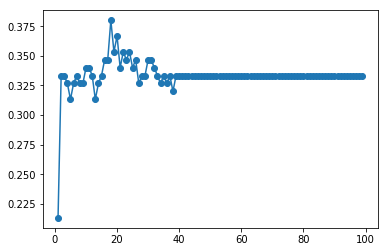

In [44]:
plt.plot(range(1,100), error_rate, marker='o')

In [46]:
knn = KNeighborsClassifier(n_neighbors= 1)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)

In [47]:
print (cm(y_test, pred_knn))
print (cr(y_test, pred_knn))

[[53 15]
 [17 65]]
             precision    recall  f1-score   support

          0       0.76      0.78      0.77        68
          1       0.81      0.79      0.80        82

avg / total       0.79      0.79      0.79       150



In [48]:
# decision tree

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
tree = DecisionTreeClassifier()

In [53]:
tree.fit(X_train, y_train)
pred_tree = tree.predict(X_test)

In [54]:
print (cm(y_test, pred_tree))
print (cr(y_test, pred_tree))

[[59  9]
 [ 4 78]]
             precision    recall  f1-score   support

          0       0.94      0.87      0.90        68
          1       0.90      0.95      0.92        82

avg / total       0.91      0.91      0.91       150



In [55]:
# randonm forest

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rfc = RandomForestClassifier(n_estimators=100)

In [59]:
rfc.fit(X_train, y_train)
pree_rfc = rfc.predict(X_test)

In [60]:
print (cm(y_test, pree_rfc))
print (cr(y_test, pree_rfc))

[[64  4]
 [ 5 77]]
             precision    recall  f1-score   support

          0       0.93      0.94      0.93        68
          1       0.95      0.94      0.94        82

avg / total       0.94      0.94      0.94       150



In [61]:
# SVM

In [62]:
from sklearn.svm import SVC

In [63]:
svc = SVC()

In [64]:
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [70]:
pred_svc = svc.predict(X_test)

In [71]:
print (cm(y_test, pred_svc))
print (cr(y_test, pred_svc))

[[68  0]
 [82  0]]
             precision    recall  f1-score   support

          0       0.45      1.00      0.62        68
          1       0.00      0.00      0.00        82

avg / total       0.21      0.45      0.28       150



/Users/michaelzeng/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [65]:
# find the better parameters

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001]} 
grid = GridSearchCV(SVC(),param_grid)

In [74]:
grid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [75]:
grid.best_params_

{'C': 10, 'gamma': 0.0001}

In [76]:
grid_predictions = grid.predict(X_test)

In [77]:
print (cm(y_test, grid_predictions))
print (cr(y_test, grid_predictions))

[[52 16]
 [15 67]]
             precision    recall  f1-score   support

          0       0.78      0.76      0.77        68
          1       0.81      0.82      0.81        82

avg / total       0.79      0.79      0.79       150



In [ ]:
# randonm forest has an accuracy of 94% - the highest